
Model: MultinomialNB
Accuracy: 0.009732360097323601
Classification Report:
                                                                            precision    recall  f1-score   support

                                                                                0.00      0.00      0.00         1
                                    and  researchers  from  industry  and       0.00      0.00      0.00         1
                                      ""Have Seidov himself come."" This        0.00      0.00      0.00         1
                                           ""I'm staying with Grandmother       0.00      0.00      0.00         1
                                                                     ""Ok       0.00      0.00      0.00         1
                                        ""What are you standing there for       0.00      0.00      0.00         1
                                ""Where do you want to bury him?"" I said       0.00      0.00      0.00         1
  

C:\Users\Omkar\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\Omkar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


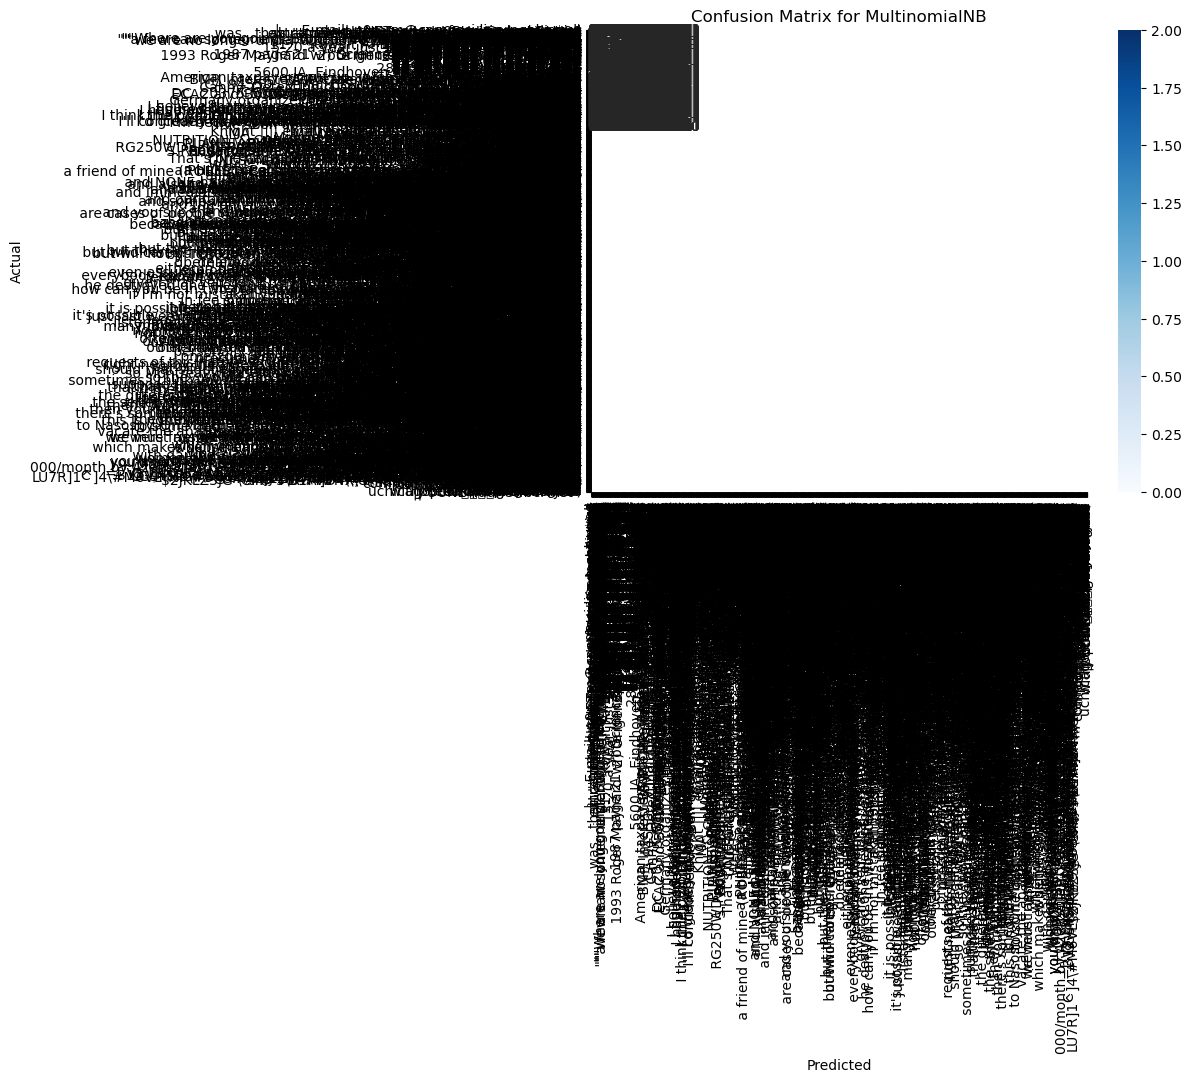

C:\Users\Omkar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


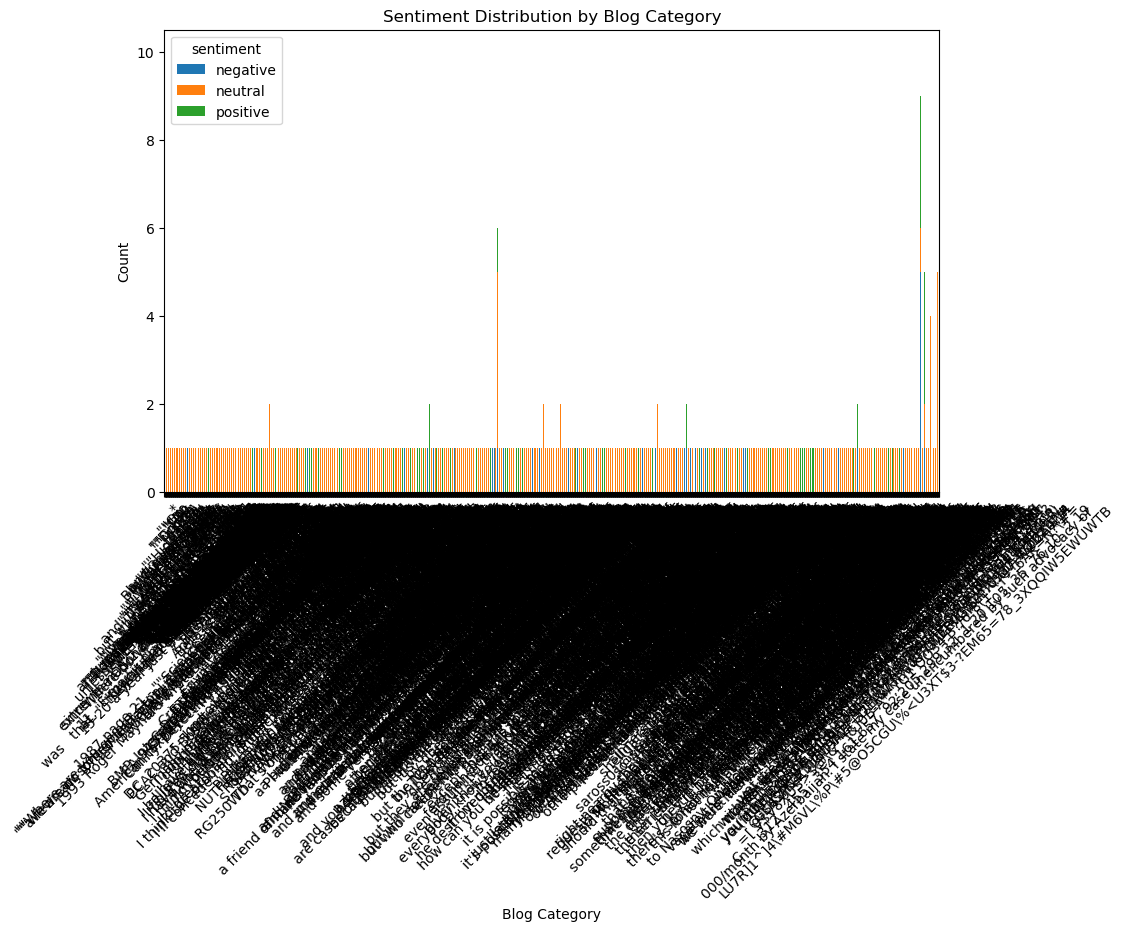

In [1]:
# Optimized Code for Naive Bayes and Sentiment Analysis with Tab Character Handling

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib
import warnings

# Disable LaTeX interpretation in matplotlib to avoid slow rendering
matplotlib.rcParams['text.usetex'] = False

# Suppress font warnings
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

# Download NLTK resources only once (if not already present)
nltk.download('vader_lexicon', quiet=True)

# Load the dataset
df = pd.read_csv('blogs.csv', low_memory=False)

# Data Preprocessing: Cleaning the text
def clean_text(text):
    if not isinstance(text, str):
        text = ''
    # Replace tabs, newlines, and other unwanted characters
    text = re.sub(r'[\t\n\r]', ' ', text)  # Replace tab, newline, and carriage return with space
    # Remove punctuation and convert text to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    return text

# Apply the cleaning function to the 'Data' column
df['cleaned_text'] = df['Data'].apply(clean_text)

# Drop rows where 'Labels' or 'cleaned_text' is NaN
df.dropna(subset=['Labels', 'cleaned_text'], inplace=True)

# Use a sample for faster testing
df_sampled = df.sample(frac=0.1, random_state=42)  # Take 10% of data for faster execution

# Faster TF-IDF Vectorization with stopword removal
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit features to 5000 for speed
X = vectorizer.fit_transform(df_sampled['cleaned_text'])
y = df_sampled['Labels']

# Escape special characters from labels for plotting
def escape_special_characters(text):
    return re.sub(r'([\\$#&%])', r'\\\1', text)

# Escape special characters in labels
df_sampled['escaped_labels'] = df_sampled['Labels'].apply(escape_special_characters)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))  # Suppress warning by using zero_division=0
    
    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df_sampled['escaped_labels']), yticklabels=np.unique(df_sampled['escaped_labels']))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Naive Bayes models (only MultinomialNB for faster execution)
models = {
    'MultinomialNB': MultinomialNB(),
}

# Loop over models and evaluate
for model_name, model in models.items():
    evaluate_model(model, model_name)

# Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    return 'positive' if score['compound'] >= 0.05 else ('negative' if score['compound'] <= -0.05 else 'neutral')

# Apply sentiment analysis to sampled data
df_sampled['sentiment'] = df_sampled['Data'].apply(analyze_sentiment)

# Visualization: Sentiment Distribution by Category
sentiment_distribution = df_sampled.groupby(['escaped_labels', 'sentiment']).size().unstack(fill_value=0)
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Blog Category')
plt.xticks(rotation=45)
plt.xlabel('Blog Category')
plt.ylabel('Count')
plt.show()
